In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# 1. Read in observation data

In [2]:
BUCKET_NAME = 'datasets-sdm'
folder = 'geoLifeCLEF/observations'
train_file, test_file = 'observations_us_train.csv', 'observations_us_test.csv'
s3_train_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, train_file)

In [3]:
train_usa = pd.read_csv(s3_train_path,header='infer', sep=';',)
train_usa.head()

,observation_id,latitude,longitude,species_id,subset
0,20000173,33.197660,-116.180680,4911,train
1,20000175,34.037968,-118.876755,4912,train
2,20000176,27.620740,-97.222690,4913,train
3,20000177,29.155582,-95.653930,4914,train
4,20000179,36.605740,-121.959510,4915,train


In [4]:
train_df, val_df = train_usa[train_usa.subset == 'train'], train_usa[train_usa.subset == 'val']
len(train_df), len(val_df), val_df

(931132,
 25099,
         observation_id   latitude   longitude  species_id subset
 76            20000264  46.499954  -90.921550        4970    val
 79            20000267  38.935577  -76.991300        3072    val
 94            20000282  41.523970 -124.045616        2560    val
 183           20000389  38.890938  -77.029945        5053    val
 242           20000648  40.207893 -111.728660        4932    val
 ...                ...        ...         ...         ...    ...
 955917        22067622  45.026695  -92.752960       10776    val
 955970        22067688  41.520172  -92.077644        4999    val
 956219        22068163  37.211212 -120.842026        5687    val
 956221        22068165  30.891344  -97.712180        4917    val
 956229        22068174  37.206974 -122.067154        5309    val
 
 [25099 rows x 5 columns])

## Filter for CA

### Convert to geopandas frame

In [5]:
val_gdf = gpd.GeoDataFrame(val_df, geometry=gpd.points_from_xy(val_df.longitude, val_df.latitude)).reset_index(drop=True)
val_gdf

,observation_id,latitude,longitude,species_id,subset,geometry
0,20000264,46.499954,-90.921550,4970,val,POINT (-90.92155 46.49995)
1,20000267,38.935577,-76.991300,3072,val,POINT (-76.99130 38.93558)
2,20000282,41.523970,-124.045616,2560,val,POINT (-124.04562 41.52397)
3,20000389,38.890938,-77.029945,5053,val,POINT (-77.02994 38.89094)
4,20000648,40.207893,-111.728660,4932,val,POINT (-111.72866 40.20789)
...,...,...,...,...,...,...
25094,22067622,45.026695,-92.752960,10776,val,POINT (-92.75296 45.02669)
25095,22067688,41.520172,-92.077644,4999,val,POINT (-92.07764 41.52017)
25096,22068163,37.211212,-120.842026,5687,val,POINT (-120.84203 37.21121)
25097,22068165,30.891344,-97.712180,4917,val,POINT (-97.71218 30.89134)


<AxesSubplot:>

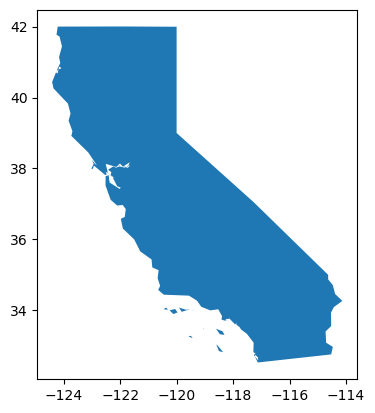

In [6]:
import geopandas as gpd

ca_path = '../data/USA_adm/USA_adm1.shp'
usa_map = gpd.read_file(ca_path)

ca_map = usa_map[usa_map['NAME_1'] == 'California']
ca_map = ca_map.simplify(0.05)
ca_map.plot()

In [7]:
val_gdf['valid'] = val_gdf.intersects(ca_map.geometry.iloc[0])
val_gdf = val_gdf[val_gdf.valid == True].drop(columns=['valid','subset']).reset_index(drop=True)
val_gdf

,observation_id,latitude,longitude,species_id,geometry
0,20000282,41.523970,-124.045616,2560,POINT (-124.04562 41.52397)
1,20001056,38.354510,-122.514270,5205,POINT (-122.51427 38.35451)
2,20001135,38.807053,-122.369255,5243,POINT (-122.36925 38.80705)
3,20002394,34.023647,-118.417330,5544,POINT (-118.41733 34.02365)
4,20003318,35.178210,-120.745760,5109,POINT (-120.74576 35.17821)
...,...,...,...,...,...
5070,22067151,37.493600,-122.368350,6192,POINT (-122.36835 37.49360)
5071,22067233,38.026356,-119.249990,5996,POINT (-119.24999 38.02636)
5072,22067543,38.826870,-122.349720,8323,POINT (-122.34972 38.82687)
5073,22068163,37.211212,-120.842026,5687,POINT (-120.84203 37.21121)


In [8]:
train_gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
train_gdf['valid'] = train_gdf.intersects(ca_map.geometry.iloc[0])
train_gdf = train_gdf[train_gdf.valid == True].drop(columns=['valid','subset']).reset_index(drop=True)
train_gdf

,observation_id,latitude,longitude,species_id,geometry
0,20000173,33.197660,-116.180680,4911,POINT (-116.18068 33.19766)
1,20000175,34.037968,-118.876755,4912,POINT (-118.87676 34.03797)
2,20000189,32.725914,-116.945040,4922,POINT (-116.94504 32.72591)
3,20000190,33.661034,-117.842430,4923,POINT (-117.84243 33.66103)
4,20000198,34.135204,-118.167020,2329,POINT (-118.16702 34.13520)
...,...,...,...,...,...
176565,22068149,32.554310,-117.085724,5908,POINT (-117.08572 32.55431)
176566,22068164,37.192880,-121.836520,6487,POINT (-121.83652 37.19288)
176567,22068168,34.372894,-119.476660,9315,POINT (-119.47666 34.37289)
176568,22068170,38.205840,-122.758660,8451,POINT (-122.75866 38.20584)


In [9]:
species_arr_train, species_arr_val = train_gdf.species_id.unique(), val_gdf.species_id.unique()
len(species_arr_train), len(species_arr_val)

(5079, 1373)

## Keep only the species_ids that are present in both, from val_gdf

In [10]:
val_overlap_gdf = val_gdf[val_gdf.species_id.isin(train_gdf.species_id)].reset_index(drop=True)
val_overlap_gdf

,observation_id,latitude,longitude,species_id,geometry
0,20000282,41.523970,-124.045616,2560,POINT (-124.04562 41.52397)
1,20001056,38.354510,-122.514270,5205,POINT (-122.51427 38.35451)
2,20001135,38.807053,-122.369255,5243,POINT (-122.36925 38.80705)
3,20002394,34.023647,-118.417330,5544,POINT (-118.41733 34.02365)
4,20003318,35.178210,-120.745760,5109,POINT (-120.74576 35.17821)
...,...,...,...,...,...
5020,22067151,37.493600,-122.368350,6192,POINT (-122.36835 37.49360)
5021,22067233,38.026356,-119.249990,5996,POINT (-119.24999 38.02636)
5022,22067543,38.826870,-122.349720,8323,POINT (-122.34972 38.82687)
5023,22068163,37.211212,-120.842026,5687,POINT (-120.84203 37.21121)


# Write to S3 bucket

In [11]:
BUCKET_NAME = 'datasets-sdm'
folder = 'kde/ca'
filename = 'ca_val_obs.pkl'
s3_write_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_write_path)

s3://datasets-sdm/kde/ca/ca_val_obs.pkl


In [12]:
# val_overlap_gdf.to_pickle(s3_write_path)

# 2. Column for each species observation

In [13]:
species_arr = val_overlap_gdf.species_id.unique()
len(species_arr)

1346

In [14]:
val_overlap_gdf

,observation_id,latitude,longitude,species_id,geometry
0,20000282,41.523970,-124.045616,2560,POINT (-124.04562 41.52397)
1,20001056,38.354510,-122.514270,5205,POINT (-122.51427 38.35451)
2,20001135,38.807053,-122.369255,5243,POINT (-122.36925 38.80705)
3,20002394,34.023647,-118.417330,5544,POINT (-118.41733 34.02365)
4,20003318,35.178210,-120.745760,5109,POINT (-120.74576 35.17821)
...,...,...,...,...,...
5020,22067151,37.493600,-122.368350,6192,POINT (-122.36835 37.49360)
5021,22067233,38.026356,-119.249990,5996,POINT (-119.24999 38.02636)
5022,22067543,38.826870,-122.349720,8323,POINT (-122.34972 38.82687)
5023,22068163,37.211212,-120.842026,5687,POINT (-120.84203 37.21121)


## Get KDE Observations for the order of the columns

In [15]:
BUCKET_NAME = 'datasets-sdm'
folder = 'kde/ca'
filename = 'geolifeclef_ca_0.05deg_kde_0.5deg_epanechnikov.pkl'

s3_read_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
kde_gdf = pd.read_pickle(s3_read_path)
kde_gdf.head()

,geometry,grid_id,prob_4911,prob_4912,prob_4922,prob_4923,prob_2329,prob_4927,prob_4930,prob_4382,...,prob_14228,prob_202,prob_9006,prob_272,prob_16726,prob_17029,prob_8230,prob_13366,prob_16533,prob_1455
0,"POLYGON ((-124.36556 40.23088, -124.36556 40.2...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((-124.36556 40.28088, -124.36556 40.3...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-124.36556 40.33088, -124.36556 40.3...",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-124.36556 40.38088, -124.36556 40.4...",3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((-124.36556 40.43088, -124.36556 40.4...",4,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
num_classes = len(kde_gdf.columns) - 2
kde_gdf_classes = kde_gdf.columns.to_list()[2:]
len(kde_gdf_classes)

5079

## Merge them

In [17]:
ca_val_gdf = pd.concat([val_overlap_gdf,gpd.GeoDataFrame(columns = kde_gdf_classes)]).fillna(0.)
ca_val_gdf

,observation_id,latitude,longitude,species_id,geometry,prob_4911,prob_4912,prob_4922,prob_4923,prob_2329,...,prob_14228,prob_202,prob_9006,prob_272,prob_16726,prob_17029,prob_8230,prob_13366,prob_16533,prob_1455
0,20000282.0,41.523970,-124.045616,2560.0,POINT (-124.04562 41.52397),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20001056.0,38.354510,-122.514270,5205.0,POINT (-122.51427 38.35451),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20001135.0,38.807053,-122.369255,5243.0,POINT (-122.36925 38.80705),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20002394.0,34.023647,-118.417330,5544.0,POINT (-118.41733 34.02365),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20003318.0,35.178210,-120.745760,5109.0,POINT (-120.74576 35.17821),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,22067151.0,37.493600,-122.368350,6192.0,POINT (-122.36835 37.49360),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,22067233.0,38.026356,-119.249990,5996.0,POINT (-119.24999 38.02636),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5022,22067543.0,38.826870,-122.349720,8323.0,POINT (-122.34972 38.82687),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5023,22068163.0,37.211212,-120.842026,5687.0,POINT (-120.84203 37.21121),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Change the dtypes appropriately

ca_val_gdf = ca_val_gdf.astype({'observation_id': 'int', 'species_id': 'int'})
ca_val_gdf

,observation_id,latitude,longitude,species_id,geometry,prob_4911,prob_4912,prob_4922,prob_4923,prob_2329,...,prob_14228,prob_202,prob_9006,prob_272,prob_16726,prob_17029,prob_8230,prob_13366,prob_16533,prob_1455
0,20000282,41.523970,-124.045616,2560,POINT (-124.04562 41.52397),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20001056,38.354510,-122.514270,5205,POINT (-122.51427 38.35451),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20001135,38.807053,-122.369255,5243,POINT (-122.36925 38.80705),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20002394,34.023647,-118.417330,5544,POINT (-118.41733 34.02365),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20003318,35.178210,-120.745760,5109,POINT (-120.74576 35.17821),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,22067151,37.493600,-122.368350,6192,POINT (-122.36835 37.49360),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,22067233,38.026356,-119.249990,5996,POINT (-119.24999 38.02636),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5022,22067543,38.826870,-122.349720,8323,POINT (-122.34972 38.82687),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5023,22068163,37.211212,-120.842026,5687,POINT (-120.84203 37.21121),0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now fill them with the correct values

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in range(len(ca_val_gdf)):
# for i in range(50):
    # print(val_overlap_gdf.loc[i])
    key = str(int(ca_val_gdf.iloc[i].species_id))
    key = 'prob_{}'.format(key)
    # print(key)
    if key in ca_val_gdf.columns:
        # print('true')
        ca_val_gdf.loc[i,key] = 1
    else: #doesnt exist, add a new column
        # val_overlap_gdf[key] = 0
        # val_overlap_gdf.loc[i,key] = 1
        print("Missed observation for species ID ",key)

ca_val_gdf

In [20]:
ca_val_gdf.prob_5309.sum(), len(val_gdf[val_gdf.species_id==5309])

(13.0, 13)

# Save to S3 bucket

In [21]:
BUCKET_NAME = 'datasets-sdm'
folder = 'kde/ca'
filename = 'ca_val_obs.pkl'
s3_write_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_write_path)
ca_val_gdf.to_pickle(s3_write_path)

s3://datasets-sdm/kde/ca/ca_val_obs.pkl
